$\Large \textbf{Datascience 1 Project Example}$

In this jupyter notebook we will do basic methods of datascience such as cleaning, merging, visualization and applying different classification algorithms such as Regression, Clustering etc.

$\large \textbf{1.1 Data Importing and Cleaning}$

We will work with crime data from London TODO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

crimeData = pd.read_csv('/Users/anilyelin/Desktop/datascience/data/2019-01-metropolitan-street.csv',delimiter=',')

crimeData.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,a8977a2a4e14252420371eb993d52e4d0b8288a7c833e6...,2019-01,Metropolitan Police Service,Metropolitan Police Service,-0.709911,50.784615,On or near Rochester Way,E01031384,Arun 018E,Violence and sexual offences,Status update unavailable,NaN
1,NaN,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
2,934e173f2bc2e1dd3a257b37939d8f97575d3eeb89ff0c...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Burglary,Status update unavailable,NaN
3,4f5b7e424bc78b1fb8c32e07da61176d2cbc5a3849d8e1...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140634,51.583427,On or near Rams Grove,E01000027,Barking and Dagenham 001A,Burglary,Status update unavailable,NaN
4,53d960600a4a9f54b785f598af4c75bdef2f79bce1a41b...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.141143,51.590873,On or near Furze Farm Close,E01000027,Barking and Dagenham 001A,Drugs,Status update unavailable,NaN


Next step is getting rid of unneccasry columns and NaN values. For instance we don't need Crime ID as well as Reported By and Falls within since this whole dataset is reported by the Metropolitan Police Service.

In [2]:
rmCol = ['Crime ID','Falls within','Reported by','Context'] #<- columns to be removed
crimeData.drop(rmCol,inplace=True,axis=1)
crimeData.head()

,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,2019-01,-0.709911,50.784615,On or near Rochester Way,E01031384,Arun 018E,Violence and sexual offences,Status update unavailable
1,2019-01,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN
2,2019-01,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Burglary,Status update unavailable
3,2019-01,0.140634,51.583427,On or near Rams Grove,E01000027,Barking and Dagenham 001A,Burglary,Status update unavailable
4,2019-01,0.141143,51.590873,On or near Furze Farm Close,E01000027,Barking and Dagenham 001A,Drugs,Status update unavailable


Next step is getting rid of the NaN values. For example record 1 in column Last outcome category the value is NaN

In [3]:
import folium
from folium import plugins
m = folium.Map((51.508530, -0.076132),zoom_start=11)
n = folium.Map((51.508530, -0.076132))               

In [4]:
#for elem in zip(latA,longA):
#    folium.CircleMarker(elem,radius=10,popup="Burglary",color='red').add_to(m)
    


In [5]:
crimeLocations = crimeData[['Latitude','Longitude']][:50000]
#m.add_children(plugins.HeatMap(crimeLocations,radius=15))
crimeLocations.to_numpy()
m.add_child(plugins.HeatMap(crimeLocations,radius=15))

$\large \textbf{Prediction of Crime Locations in London City Area using Linear Classifier}$

$\textbf{Visualization of the crime types for january 2019}$

In [6]:
crimeData.head()

,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,2019-01,-0.709911,50.784615,On or near Rochester Way,E01031384,Arun 018E,Violence and sexual offences,Status update unavailable
1,2019-01,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN
2,2019-01,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Burglary,Status update unavailable
3,2019-01,0.140634,51.583427,On or near Rams Grove,E01000027,Barking and Dagenham 001A,Burglary,Status update unavailable
4,2019-01,0.141143,51.590873,On or near Furze Farm Close,E01000027,Barking and Dagenham 001A,Drugs,Status update unavailable


Text(0.5, 0, 'Crime type')

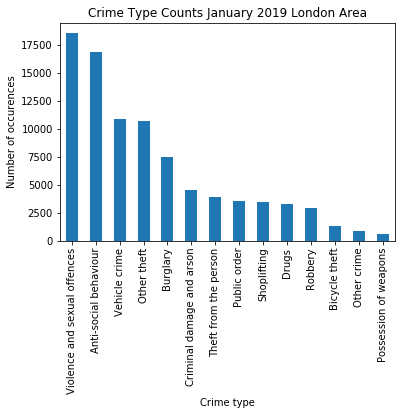

In [7]:
crimeType = crimeData['Crime type']
crimeType.value_counts().plot.bar()
plt.title("Crime Type Counts January 2019 London Area")
plt.ylabel('Number of occurences')
plt.xlabel('Crime type')

We can clearly see that **Violence and sexual offences** and **anti-social behaviour** are the two most happening crime type.
On the other hand we the crime types **Other crime** which is not rather specified by the police as well as **Possession of weapon** are on the lower end of the crime counts.

(50, 52)

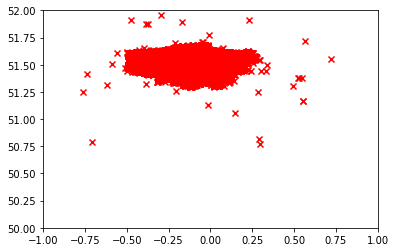

In [8]:
plt.scatter(crimeData['Longitude'],crimeData['Latitude'],color='red',marker='x')
plt.xlim(-1,1)
plt.ylim(50,52)

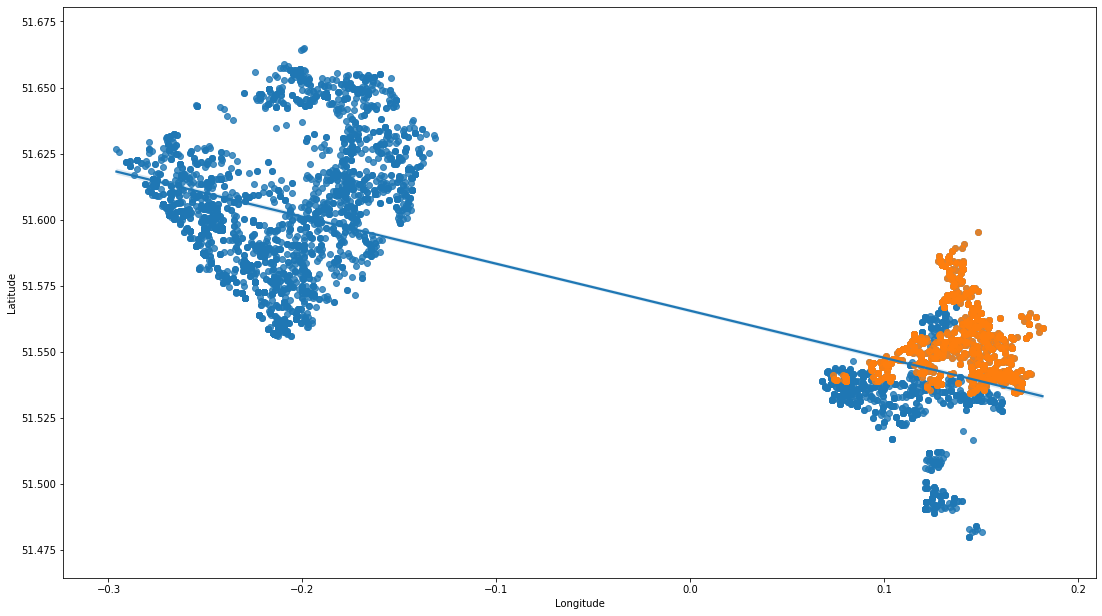

In [9]:
# sample Linear Regression Plot by Seaborn, just an example
fig,ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(x=crimeData['Longitude'][1:5000],y=crimeData['Latitude'][1:5000],fit_reg=True)
sns.regplot(x=crimeData['Longitude'][1:1000],y=crimeData['Latitude'][1:1000],fit_reg=False)

In [10]:
crimeData_burglary = crimeData[['Latitude','Longitude']][crimeData['Crime type']=='Burglary']
crimeData_drugs = crimeData[['Latitude','Longitude']][crimeData['Crime type']=='Drugs']
crimeData_vso = crimeData[['Latitude','Longitude']][crimeData['Crime type']=='Vehicle crime']
crimeData_asb = crimeData[['Latitude','Longitude']][crimeData['Crime type']=='Anti-social behaviour']
crimeData_ot = crimeData[['Latitude','Longitude']][crimeData['Crime type']=='Other theft']
crimeData_vc = crimeData[['Latitude','Longitude']][crimeData['Crime type']=='Vehicle crime']
crimeData_po = crimeData[['Latitude','Longitude']][crimeData['Crime type']=='Public order']
crimeData_oc = crimeData[['Latitude','Longitude']][crimeData['Crime type']=='Other crime']
crimeData_cda = crimeData[['Latitude','Longitude']][crimeData['Crime type']=='Criminal damage and arson']
crimeData_robbery = crimeData[['Latitude','Longitude']][crimeData['Crime type']=='Robbery']
crimeData_shopl = crimeData[['Latitude','Longitude']][crimeData['Crime type']=='Shoplifting']
crimeData_tfp = crimeData[['Latitude','Longitude']][crimeData['Crime type']=='Theft from the person']
crimeData_weapon = crimeData[['Latitude','Longitude']][crimeData['Crime type']=='Possession of weapons']
crimeData_bicycle = crimeData[['Latitude','Longitude']][crimeData['Crime type']=='Bicycle theft']
#storing all crime types in a dictionary
#crimeData_values = {crimeData_burglary:"Burglary",crimeData_drugs:"Drugs",crimeData_vso:"Violence and sexual offence",
#                   crimeData_asb:"Anti Social Behaviour",crimeData_ot:"Other theft",crimeData_vc:"Vehicle Crime",
#                   crimeData_po:"Public Order",crimeData_oc:"Other crime",crimeData_cda:"Criminal Damage and arson",
#                   crimeData_robbery:"Robbery",crimeData_shopl:"Shoplifting",crimeData_tfp:"Theft from the person",
#                   crimeData_weapon:"Possession of weapons",crimeData_bicycle:"Bicycle theft"}


In [11]:
#retrieving subsets of the data for visualization purposes we take only the first 100 rows for each
#crime type otherwise the map gets messy

crimeData_burglary=crimeData_burglary[:100]
crimeData_drugs=crimeData_drugs[:100]
crimeData_vso=crimeData_vso[:100]
crimeData_asb=crimeData_asb[:100]
crimeData_ot=crimeData_ot[:100]
crimeData_vc=crimeData_vc[:100]
crimeData_po=crimeData_po[:100]
crimeData_oc=crimeData_oc[:100]
crimeData_cda=crimeData_cda[:100]
crimeData_robbery=crimeData_robbery[:100]
crimeData_shopl=crimeData_shopl[:100]
crimeData_tfp=crimeData_tfp[:100]
crimeData_weapon=crimeData_weapon[:100]
crimeData_bicycle=crimeData_bicycle[:1000]

for i in range(len(crimeData_burglary)):
    folium.CircleMarker(crimeData_burglary.iloc[i],popup='Burglary',color='red',radius=10).add_to(n)
    folium.CircleMarker(crimeData_drugs.iloc[i],popup='Drugs',color='green',radius=10).add_to(n)
    folium.CircleMarker(crimeData_vso.iloc[i],popup='Vehicle Crime',color='blue',radius=10).add_to(n)
    folium.CircleMarker(crimeData_asb.iloc[i],popup='Anti-social behaviour',color='yellow',radius=10).add_to(n)
    folium.CircleMarker(crimeData_ot.iloc[i],popup='Other theft',color='orange',radius=10).add_to(n)
    folium.CircleMarker(crimeData_vc.iloc[i],popup='Vehicle crime',color='black',radius=10).add_to(n)
    folium.CircleMarker(crimeData_po.iloc[i],popup='Public order',color='purple',radius=10).add_to(n)
    folium.CircleMarker(crimeData_oc.iloc[i],popup='Other crime',color='pink',radius=10).add_to(n)
    folium.CircleMarker(crimeData_cda.iloc[i],popup='Drugs',color='grey',radius=10).add_to(n)
    folium.CircleMarker(crimeData_robbery.iloc[i],popup='Robbery',color='brown',radius=10).add_to(n)
    folium.CircleMarker(crimeData_shopl.iloc[i],popup='Shoplifting',color='magenta',radius=10).add_to(n)
    folium.CircleMarker(crimeData_tfp.iloc[i],popup='Drugs',color='cyan',radius=10).add_to(n)
    folium.CircleMarker(crimeData_weapon.iloc[i],popup='Possession of weapon',color='white',radius=10).add_to(n)
    folium.CircleMarker(crimeData_bicycle.iloc[i],popup='Bicycle theft',color='lime',radius=10).add_to(n)

n

$\large \textbf{Predicting upcoming bicycle theft locations in London City Area using Linear Regression}$

Following the simple formula of linear regression which is

$$y=b_0 + b_1\cdot x_1$$

with $b_0$ being the intercept and $b_1$ being the slope

$b_1$ can be determined with $$b_1=\frac{\sum_{i=1}^n (x_i-\overline{x})(y_i - \overline{y})}{\sum_{i=1}^n (x_i-\overline{x})^2}$$

$b_0=y-b_1\cdot x_1$

We will use the Linear Regression from the libary scikit learn and apply it to bicycle crime scenario where we want to predict upcoming crime locations for bicycle thefts.
We will split our data 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

crimeData_bicycle = crimeData[['Latitude','Longitude']][crimeData['Crime type']=='Bicycle theft']


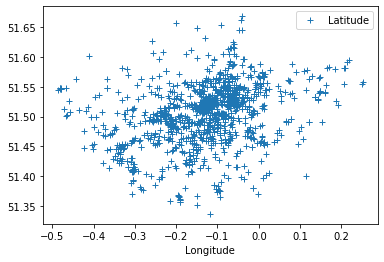

In [13]:
crimeData_bicycle.plot(x='Longitude',y='Latitude',style='+')

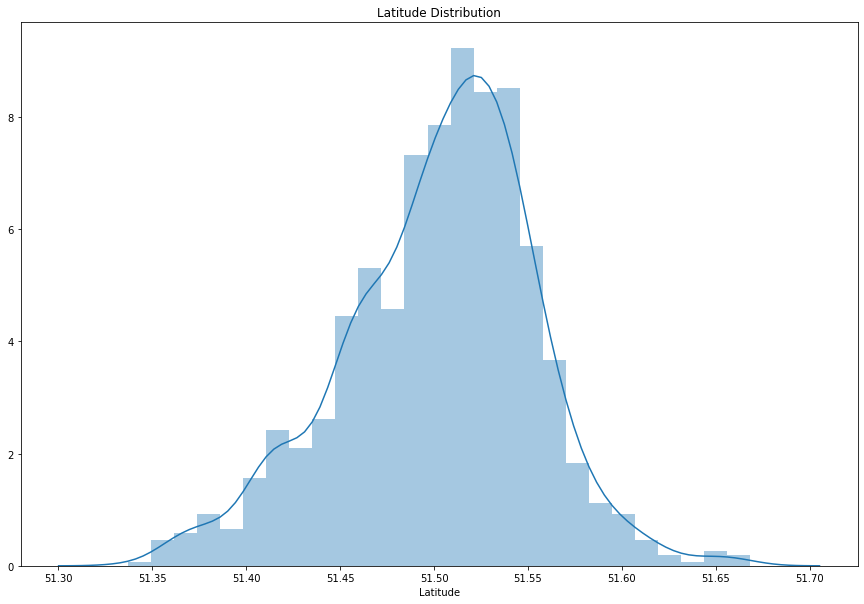

In [14]:
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.title("Latitude Distribution")
seabornInstance.distplot(crimeData_bicycle['Latitude'])


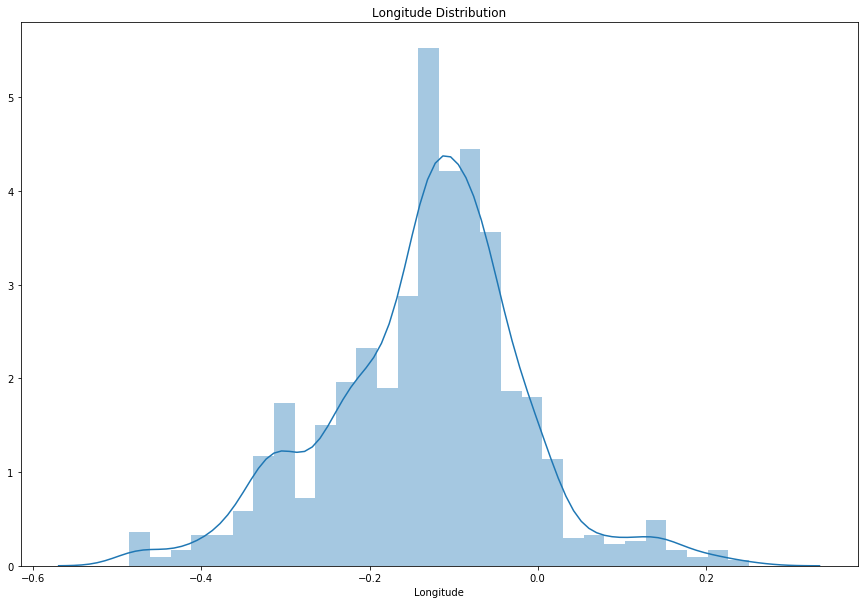

In [15]:
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.title("Longitude Distribution")
seabornInstance.distplot(crimeData_bicycle['Longitude'])

In [16]:
crimeData_bicycle = crimeData_bicycle[:1000]
lat = crimeData_bicycle['Latitude'].values.reshape(-1,1)
long = crimeData_bicycle['Longitude'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(lat,long,test_size=0.2,random_state=0)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

print("Regression Line Intercept: ",regressor.intercept_)
print("Regression Line Slope: ",regressor.coef_)
print(crimeData_bicycle.shape)

Regression Line Intercept:  [-34.16380883]
Regression Line Slope:  [[0.66069679]]
(1000, 2)


In [17]:
y_pred = regressor.predict(X_test)
predictionResults = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
predictionResults['Deviation'] = predictionResults['Actual'][:200]-predictionResults['Predicted'][:200]
predictionResults['Test Data'] = X_test
predictionResults

,Actual,Predicted,Deviation,Test Data
0,-0.070025,-0.118385,0.048360,51.529574
1,-0.319459,-0.187304,-0.132155,51.425261
2,-0.069860,-0.108382,0.038522,51.544714
3,-0.106263,-0.118494,0.012231,51.529409
4,-0.135541,-0.162072,0.026531,51.463450
...,...,...,...,...
195,-0.093879,-0.158653,0.064774,51.468625
196,-0.018200,-0.161033,0.142833,51.465023
197,-0.324940,-0.140565,-0.184375,51.496002
198,-0.123379,-0.147513,0.024134,51.485486


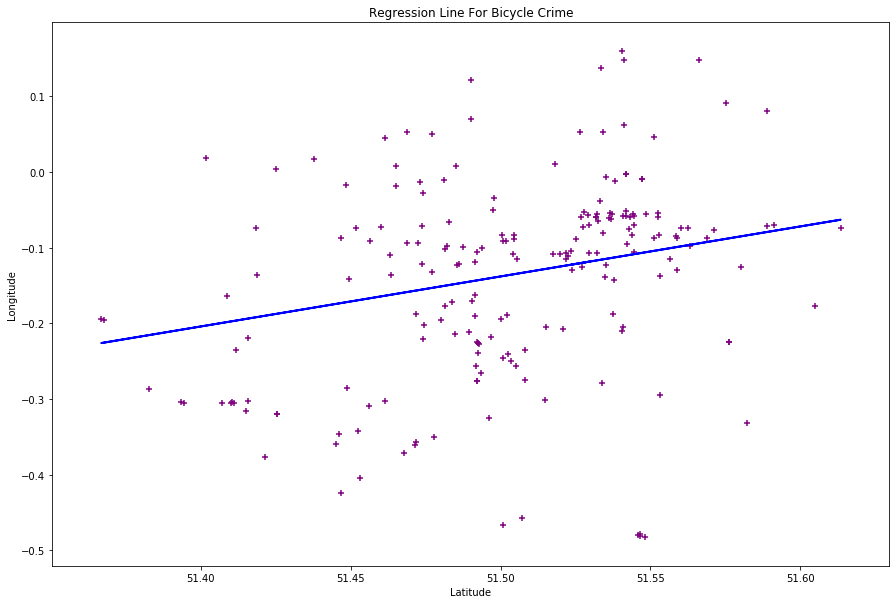

In [18]:

plt.figure(figsize=(15,10))
plt.tight_layout()
plt.scatter(X_test,y_test,color='purple',marker='+')
plt.plot(X_test,y_pred,color='blue',linewidth=2)
plt.title("Regression Line For Bicycle Crime")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()